# Search for student's rooms in Mexico city

In this project I will use the data of "housinganywhere" web page to check the price of the rooms of the different places and also have a perspective of the "venues categories".
My goal is try to find a correlation between price and "Venue category"and also provide this information to the students that want to rent a room in mexico city.

## The Plan

I wanna follow the same track as the homework, using all the knowledge provided by the capstone. I will divide the project in 3 parts: Get the table address and price, get the geolocation and analize.
### Get the table address and price
1. Import the useful libraries
2. get the wikipedia info and convert it in a soup
3. Get the useful data
4. Create the dataframe and display it

### Get the geolocation
1. Use the google geolocation to get the latitude and longitude
2. Create the table with the new columns

### Analize
1. Use Folium to display the address points
2. Use foursquare to see the venues categories
3. check for a correlation of the price and the venues categories
4. Use clusters

## Get the table address and price

### 1 Import the necessaries libraries

In [9]:
#Libraries to work with the web
from bs4 import BeautifulSoup
import requests

#Libraries to work with the data
import pandas as pd
import numpy as np
import time
import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py_0 conda-forge
    branca:  0.3.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge

branca-0.3.0-p 100% |################################| Time: 0:00:00 804.92 kB/s
vincent-0.4.4- 100% |################################| Time: 0:00:00 921.96 kB/s
altair-2.2.2-p 100% |################################| Time: 0:00:00   1.31 MB/s
folium-0.5.0-p 100% |################################| Time: 0:00:00  40.37 MB/s
Libraries imported.


In [20]:
def get_price_address(n = 1):
    pages = n
    prices = []
    addresses = []
    for number in range(pages):
        page = number + 1
        url = "https://housinganywhere.com/s/Mexico-City--Mexico?page={}".format(page)
        source = requests.get(url).text
        soup = BeautifulSoup(source, "lxml")
        mainDiv = soup.find("div", {"class": "card-columns-search"})
        mydivs = soup.findAll("div", {"class": "card card-listing card-listing__link"})
        for div in mydivs:
            price = div.find("span", {"class": "flex-vertical-middle font-size-lg strong"}).text
            address = div.a.text
            prices.append(price)
            addresses.append(address)
    return prices, addresses

In [44]:
def create_df(prices=[], addresses=[]):
    df = pd.DataFrame({"price": prices, "address": addresses})
    df["price"] = df["price"].str.replace("€", "").astype("int64")
    df["address"] = df["address"].str.replace("Room at ", "").str.replace("Apartment at ", "")
    return df

In [45]:
prices, addresses = get_price_address(n = 4)
df = create_df(prices, addresses)
df.head()

,address,price
0,Calzada de Tlalpan,299
1,Avenida Progreso,315
2,Lago Neuchatel,667
3,Fuente de Apolo,368
4,Viaducto Tlalpan,400


## Get the Geolocation

In [54]:
# The code was removed by Watson Studio for sharing.

In [51]:
# The code was removed by Watson Studio for sharing.

In [50]:
address_df = df.groupby(["address"])["price"].mean().reset_index()
address_df.head()

,address,price
0,1a. Cerrada de Prolongación Juárez,345.00
1,Agustín Melgar,2083.00
2,Aida,685.00
3,Amacuzac,197.25
4,Avenida Coyoacán,257.00


In [55]:
address_df["Latitude"] = np.nan
address_df["Longitude"] = np.nan
count = 0
for address in address_df["address"]:
    url= 'https://maps.googleapis.com/maps/api/geocode/json?address={}, Mexico city, Mexico, MX &key={}'.format(address, api_key)
    try: 
        response = requests.get(url).json() 
        geographical_data = response['results'][0]['geometry']['location'] 
        lat = geographical_data['lat']
        lon = geographical_data['lng']
        address_df.loc[count, "Latitude"] = lat
        address_df.loc[count, "Longitude"] = lon
    except:
        print("Google no a podido encontrar el siguiente address")
    print('Index: {}, The Address: {}, The Lat: {}, The Lon: {}'.format(count, address_df.loc[count, "address"], address_df.loc[count, "Latitude"], address_df.loc[count, "Longitude"]))
    print("----------------------------------------------------------------------------")
    time.sleep(1)
    count = count + 1

Index: 0, The Address: 1a. Cerrada de Prolongación Juárez, The Lat: 19.3542376, The Lon: -99.2917727
----------------------------------------------------------------------------
Index: 1, The Address: Agustín Melgar, The Lat: 19.418939, The Lon: -99.17701500000001
----------------------------------------------------------------------------
Index: 2, The Address: Aida, The Lat: 19.413894, The Lon: -99.168326
----------------------------------------------------------------------------
Index: 3, The Address: Amacuzac, The Lat: 18.6004449, The Lon: -99.3700834
----------------------------------------------------------------------------
Index: 4, The Address: Avenida Coyoacán, The Lat: 19.3793426, The Lon: -99.16908989999999
----------------------------------------------------------------------------
Index: 5, The Address: Avenida Isaac Newton, The Lat: 19.4333993, The Lon: -99.18879869999999
----------------------------------------------------------------------------
Index: 6, The Address:

In [56]:
address_df.head()

,address,price,Latitude,Longitude
0,1a. Cerrada de Prolongación Juárez,345.00,19.354238,-99.291773
1,Agustín Melgar,2083.00,19.418939,-99.177015
2,Aida,685.00,19.413894,-99.168326
3,Amacuzac,197.25,18.600445,-99.370083
4,Avenida Coyoacán,257.00,19.379343,-99.169090


In [58]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
address      69 non-null object
price        69 non-null float64
Latitude     68 non-null float64
Longitude    68 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.2+ KB


In [59]:
df_address = address_df.dropna()
df_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
address      68 non-null object
price        68 non-null float64
Latitude     68 non-null float64
Longitude    68 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.7+ KB


In [60]:
print(df_address.isna().any())

address      False
price        False
Latitude     False
Longitude    False
dtype: bool


## Analize

In [63]:
# The code was removed by Watson Studio for sharing.

In [98]:
# The code was removed by Watson Studio for sharing.

In [ ]:
df_data_1 = df_address.copy()

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
address      68 non-null object
price        68 non-null float64
Latitude     68 non-null float64
Longitude    68 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.7+ KB


In [4]:
df_data_1.sort_values(by="price", ascending=False).head()

,address,price,Latitude,Longitude
5,Avenida Isaac Newton,3156.0,19.433399,-99.188799
44,Juan Salvador Agraz,3108.0,19.359329,-99.278663
47,Lamartine,2256.0,19.432128,-99.189754
1,Agustín Melgar,2083.0,19.418939,-99.177015
57,Río Atoyac,1226.0,19.425307,-99.174192


### We will classify our price in 4 different categories
1. Cheap
2. intermediate
3. expensive
4. Very Expensive

I will use the quartiles to binning the data

In [5]:
df_data_1.describe()

,price,Latitude,Longitude
count,68.000000,68.000000,68.000000
mean,399.366422,19.391844,-99.041485
std,603.906514,0.144841,1.388082
min,68.000000,18.600445,-101.639698
25%,159.250000,19.353112,-99.190558
50%,223.500000,19.394389,-99.168700
75%,313.125000,19.432136,-99.144734
max,3156.000000,20.101061,-88.044096


In [6]:
group_names = ["Cheap", "Intermediate", "Expensive", "Very Expensive"]
df_data_1["binned_price"] = pd.cut(df_data_1["price"], [50.00, 160.00, 224.00, 314.00, 3157.00] , labels=group_names)
df_data_1[["price", "binned_price"]].head(10)

,price,binned_price
0,345.00,Very Expensive
1,2083.00,Very Expensive
2,685.00,Very Expensive
3,197.25,Intermediate
4,257.00,Expensive
5,3156.00,Very Expensive
6,127.00,Cheap
7,315.00,Very Expensive
8,151.00,Cheap
9,202.00,Intermediate


### We will use geopy to get the location of mexico city

In [10]:
address = 'Mexico City, MX'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexito City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexito City are 19.4326009, -99.1333416.


### Now we wanna create the map

#### Colors
1. Cheap: Purple
2. Intermediate: Blue
3. Expensive: Yellow
4. Very Expensive: Red

In [11]:
# create map
map_price = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
colors_array = {"Cheap": "#8000ff", "Intermediate": "#2adddd", "Expensive": "#d4dd80", "Very Expensive": "#ff0000"}

# add markers to the map
markers_colors = []
for lat, lon, poi, bPrice in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['address'], df_data_1['binned_price']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(bPrice), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors_array[bPrice],
        fill=True,
        fill_color=colors_array[bPrice],
        fill_opacity=0.7).add_to(map_price)
       
map_price

### Analize
We can see that most of the expensive rooms are located in the center of the city and the cheapest are located in the periphery.

### Using foursquare to see the venues categories

#### Defining the credentials

In [1]:
# The code was removed by Watson Studio for sharing.

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Creating the function to extract categories

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
mexico_city_venues = getNearbyVenues(names=df_data_1["address"], latitudes=df_data_1["Latitude"], longitudes=df_data_1["Longitude"])

1a. Cerrada de Prolongación Juárez
Agustín Melgar
Aida
Amacuzac
Avenida Coyoacán
Avenida Isaac Newton
Avenida Mario Colin
Avenida Progreso
Avenida Té
Avenida Universidad
Avenida de los Insurgentes Sur
Balderas
Belisario Domínguez
Calle Cerrada
Calle Golfo de Bengala
Calle Juárez
Calle Naranjo
Calle Prolongación Hidalgo
Calle Uno
Calle Uxmal
Callejon del Puente
Calzada de Tlalpan
Calzada de la Virgen
Carretera Picacho-Ajusco
Cerrada Diligencias
Cerrada Torreón
Chapulin
Circuito de la Unidad
Cobre
Eje Vial 3 Poniente
Encelado
Federico Montes
Felipe Carrillo Puerto
Fernando de Alva Ixtlilxóchitl
Ferrocarril de Cuernavaca
Fuente de Apolo
Félix Cuevas
General Benjamín Hill
Gladiolas
Heroes de Padierna
Iliada
Insurgentes Sur
Jardín del Centenariio
José María Pino Suárez
Juan Salvador Agraz
Kopoma
Lago Neuchatel
Lamartine
Mario de La Cueva
Michín
Minatitlan
Pablo Ucello
Pachuca
Plaza Tajín
Primera Cerrada de Privada Camarones
Privada de Chimalistac
Rio Panuco
Río Atoyac
San Francisco
Santa Cr

In [16]:
print(mexico_city_venues.shape)
mexico_city_venues.head()

(3481, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1a. Cerrada de Prolongación Juárez,19.354238,-99.291773,La Juquilita,19.354816,-99.292893,Taco Place
1,1a. Cerrada de Prolongación Juárez,19.354238,-99.291773,Pizza y Subs 997,19.353869,-99.291198,Pizza Place
2,1a. Cerrada de Prolongación Juárez,19.354238,-99.291773,Dive Encounters,19.355141,-99.291436,Dive Shop
3,1a. Cerrada de Prolongación Juárez,19.354238,-99.291773,Mini Burger,19.355811,-99.294854,Burger Joint
4,1a. Cerrada de Prolongación Juárez,19.354238,-99.291773,el taco loco 2,19.356696,-99.294988,Taco Place


In [17]:
#Chek how many unique venues are returned by each neighborhood
mexico_city_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
1a. Cerrada de Prolongación Juárez,25,25,25,25,25,25
Agustín Melgar,100,100,100,100,100,100
Aida,100,100,100,100,100,100
Amacuzac,6,6,6,6,6,6
Avenida Coyoacán,53,53,53,53,53,53
Avenida Isaac Newton,100,100,100,100,100,100
Avenida Mario Colin,49,49,49,49,49,49
Avenida Progreso,97,97,97,97,97,97
Avenida Té,30,30,30,30,30,30


#### Now check how many unique categories are retuned

In [18]:
print('There are {} uniques categories.'.format(len(mexico_city_venues['Venue Category'].unique())))

There are 286 uniques categories.


### Check who are the address with less venues

In [19]:
mexico_city_venues["Neighborhood"].value_counts().sort_values().head(10)

Calle Prolongación Hidalgo     5
Amacuzac                       6
Toltecas                       8
Callejon del Puente            8
Calle Golfo de Bengala         8
Cobre                          9
Pachuca                        9
Privada de Chimalistac        12
Felipe Carrillo Puerto        13
Calzada de la Virgen          15
Name: Neighborhood, dtype: int64

#### Now I wanna check where is located

In [20]:
less_venues = mexico_city_venues["Neighborhood"].value_counts().sort_values().head(10).reset_index()["index"].values
less_venues

array(['Calle Prolongación Hidalgo', 'Amacuzac', 'Toltecas',
       'Callejon del Puente', 'Calle Golfo de Bengala', 'Cobre', 'Pachuca',
       'Privada de Chimalistac', 'Felipe Carrillo Puerto',
       'Calzada de la Virgen'], dtype=object)

In [21]:
df_data_1.head()

,address,price,Latitude,Longitude,binned_price
0,1a. Cerrada de Prolongación Juárez,345.00,19.354238,-99.291773,Very Expensive
1,Agustín Melgar,2083.00,19.418939,-99.177015,Very Expensive
2,Aida,685.00,19.413894,-99.168326,Very Expensive
3,Amacuzac,197.25,18.600445,-99.370083,Intermediate
4,Avenida Coyoacán,257.00,19.379343,-99.169090,Expensive


In [22]:
less_venues_df = df_data_1[df_data_1['address'].isin(less_venues)]
less_venues_df

,address,price,Latitude,Longitude,binned_price
3,Amacuzac,197.250000,18.600445,-99.370083,Intermediate
14,Calle Golfo de Bengala,184.000000,19.457357,-99.187474,Intermediate
17,Calle Prolongación Hidalgo,299.000000,19.364274,-99.296939,Expensive
20,Callejon del Puente,230.000000,19.530935,-99.244428,Expensive
22,Calzada de la Virgen,181.000000,19.321908,-99.125049,Intermediate
28,Cobre,138.000000,19.406428,-101.639698,Cheap
32,Felipe Carrillo Puerto,312.500000,19.580334,-88.044096,Expensive
52,Pachuca,283.666667,20.101061,-98.759131,Expensive
55,Privada de Chimalistac,138.000000,19.340330,-99.183432,Cheap
63,Toltecas,253.000000,19.358601,-99.104667,Expensive


In [23]:
# create map
map_venues_less = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
markers_colors = []
for lat, lon, poi in zip(less_venues_df['Latitude'], less_venues_df['Longitude'], less_venues_df['address']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(bPrice), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.7).add_to(map_venues_less)
       
map_venues_less

#### Analize
Addresses with less venues are far away of the city's center

### Analize each Address

In [35]:
# one hot encoding
mexico_onehot = pd.get_dummies(mexico_city_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mexico_onehot['Neighborhood'] = mexico_city_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mexico_onehot.columns[182]] + list(mexico_onehot.columns[:182]) + list(mexico_onehot.columns[183:])
mexico_onehot = mexico_onehot[fixed_columns]

mexico_onehot.head()

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,1a. Cerrada de Prolongación Juárez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1a. Cerrada de Prolongación Juárez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1a. Cerrada de Prolongación Juárez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1a. Cerrada de Prolongación Juárez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1a. Cerrada de Prolongación Juárez,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
mexico_onehot.shape

(3481, 286)

#### Now we wanna groups by neighborhood and take the mean

In [37]:
mexico_grouped = mexico_onehot.groupby('Neighborhood').mean().reset_index()
mexico_grouped

,Neighborhood,ATM,Accessories Store,American Restaurant,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,1a. Cerrada de Prolongación Juárez,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1,Agustín Melgar,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.000000,0.000000
2,Aida,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.020000,0.000000,0.000000,0.010000,0.01,0.00,0.000000,0.000000,0.000000,0.000000
3,Amacuzac,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
4,Avenida Coyoacán,0.000000,0.000000,0.000000,0.000000,0.00,0.018868,0.018868,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.037736,0.000000,0.000000
5,Avenida Isaac Newton,0.000000,0.000000,0.010000,0.000000,0.01,0.030000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
6,Avenida Mario Colin,0.000000,0.000000,0.020408,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.020408,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
7,Avenida Progreso,0.000000,0.000000,0.000000,0.000000,0.00,0.020619,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000
8,Avenida Té,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.033333,0.000000,0.000000
9,Avenida Universidad,0.000000,0.000000,0.021978,0.010989,0.00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.021978,0.000000


In [38]:
mexico_grouped.shape

(68, 286)

#### Now I just wanna know The first 6 most common venues

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    #Return only the number of values that user wanna
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mexico_grouped['Neighborhood']

for ind in np.arange(mexico_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mexico_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,1a. Cerrada de Prolongación Juárez,Taco Place,Pizza Place,Mexican Restaurant,Shopping Mall,Burger Joint,Gym
1,Agustín Melgar,Mexican Restaurant,Restaurant,Bakery,Park,Taco Place,Coffee Shop
2,Aida,Mexican Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Juice Bar,Gym / Fitness Center
3,Amacuzac,Brewery,Hotel,Pet Store,Plaza,Dessert Shop,Food & Drink Shop
4,Avenida Coyoacán,Mexican Restaurant,Taco Place,Café,Coffee Shop,Pizza Place,Ice Cream Shop
5,Avenida Isaac Newton,Bakery,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Pizza Place,Argentinian Restaurant
6,Avenida Mario Colin,Mexican Restaurant,Taco Place,Coffee Shop,Pizza Place,Public Art,Fast Food Restaurant
7,Avenida Progreso,Taco Place,Mexican Restaurant,Restaurant,Burger Joint,Bar,Seafood Restaurant
8,Avenida Té,Mexican Restaurant,Taco Place,Pizza Place,Sushi Restaurant,Bakery,Bar
9,Avenida Universidad,Ice Cream Shop,Coffee Shop,Gym / Fitness Center,Department Store,Pizza Place,Sushi Restaurant


### Cluster neighborhoods

In [42]:
# set number of clusters
kclusters = 5

mexico_grouped_clustering = mexico_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mexico_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 1, 0, 1, 0, 0, 0, 1], dtype=int32)

### Now we will create a new dataframe that includes the labels, localizations, address, price and venues

In [45]:
df_data_1.head()

,address,price,Latitude,Longitude,binned_price,Cluster Labels
0,1a. Cerrada de Prolongación Juárez,345.00,19.354238,-99.291773,Very Expensive,2
1,Agustín Melgar,2083.00,19.418939,-99.177015,Very Expensive,1
2,Aida,685.00,19.413894,-99.168326,Very Expensive,1
3,Amacuzac,197.25,18.600445,-99.370083,Intermediate,1
4,Avenida Coyoacán,257.00,19.379343,-99.169090,Expensive,0


In [49]:
mexico_merged = df_data_1.rename(index=str, columns={"address": "Neighborhood"})

# add clustering labels
mexico_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
mexico_merged = mexico_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mexico_merged.head() # check the last columns!

,Neighborhood,price,Latitude,Longitude,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,1a. Cerrada de Prolongación Juárez,345.00,19.354238,-99.291773,Very Expensive,2,Taco Place,Pizza Place,Mexican Restaurant,Shopping Mall,Burger Joint,Gym
1,Agustín Melgar,2083.00,19.418939,-99.177015,Very Expensive,1,Mexican Restaurant,Restaurant,Bakery,Park,Taco Place,Coffee Shop
2,Aida,685.00,19.413894,-99.168326,Very Expensive,1,Mexican Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Juice Bar,Gym / Fitness Center
3,Amacuzac,197.25,18.600445,-99.370083,Intermediate,1,Brewery,Hotel,Pet Store,Plaza,Dessert Shop,Food & Drink Shop
4,Avenida Coyoacán,257.00,19.379343,-99.169090,Expensive,0,Mexican Restaurant,Taco Place,Café,Coffee Shop,Pizza Place,Ice Cream Shop


### Analizing the new DataFrame

I just wanna analize the 1st Most common vanue, because for me ist the most important 

In [57]:
number_venues = mexico_merged["1st Most Common Venue"].value_counts()
number_venues

Mexican Restaurant        28
Taco Place                13
Ice Cream Shop             3
Bakery                     3
Art Museum                 2
Convenience Store          2
Coffee Shop                2
Seafood Restaurant         1
Pharmacy                   1
Motel                      1
Arts & Crafts Store        1
Bar                        1
Brewery                    1
Boutique                   1
Laundromat                 1
Soccer Field               1
ATM                        1
Movie Theater              1
Furniture / Home Store     1
Restaurant                 1
Japanese Restaurant        1
Fast Food Restaurant       1
Name: 1st Most Common Venue, dtype: int64

Now I can see that the most abundant in mexico city is the mexican food xD and the tacos

In [53]:
import matplotlib.pyplot as plt

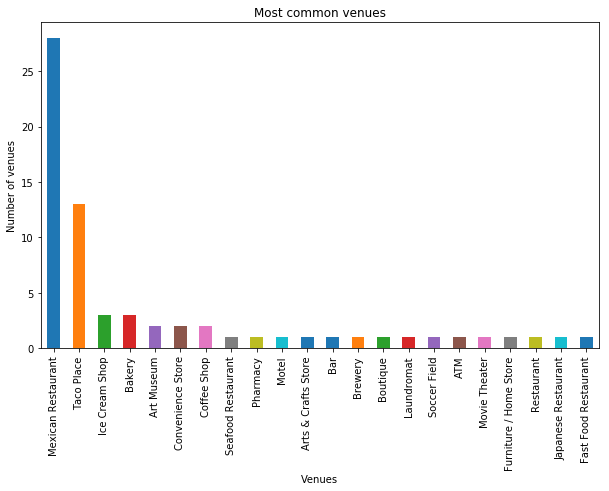

In [59]:
# step 2: plot data
number_venues.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Most common venues') # add title to the plot

plt.show()

In [71]:
mexico_merged.pivot_table(index=["1st Most Common Venue"], columns=["binned_price"], values=['price'])

price                                        
binned_price                 Cheap Intermediate   Expensive Very Expensive
1st Most Common Venue                                                     
ATM                            NaN          NaN  299.000000            NaN
Art Museum                     NaN       207.00  253.000000            NaN
Arts & Crafts Store     138.000000          NaN         NaN            NaN
Bakery                         NaN          NaN  287.500000    3156.000000
Bar                            NaN       193.00         NaN            NaN
Boutique                       NaN          NaN         NaN     667.000000
Brewery                        NaN       197.25         NaN            NaN
Coffee Shop                    NaN          NaN         NaN    1738.000000
Convenience Store        83.000000          NaN  230.000000            NaN
Fast Food Restaurant           NaN          NaN  253.000000            NaN
Furniture / Home Store         NaN          NaN  283.666667            NaN
Ice Cream Shop                 NaN       181.50  299.000000            NaN
Japanese Restaurant            NaN          NaN         NaN     391.000000
Laundromat                     NaN       181.00         NaN            NaN
Mexican Restaurant      117.000000       187.25  272.833333    1005.875000
Motel                   124.000000          NaN         NaN            NaN
Movie Theater                  NaN       202.00         NaN            NaN
Pharmacy                124.000000          NaN         NaN            NaN
Restaurant                     NaN          NaN         NaN     400.000000
Seafood Restaurant      135.000000          NaN         NaN            NaN
Soccer Field                   NaN       195.00         NaN            NaN
Taco Place              135.916667       217.00  279.500000     325.666667

So, if you are a fan of mexican food or Taco Place, you can rent a room or appartment near, because the mexican food and Taco place are the most common and you can find them in whatever place.
Restaurants, Japanese Restaurant, Boutique and coffe shops only are in very expensive places.
While seafood Restaurant, Arts & creaft Store and Motel only are in Cheap places.

In [77]:
venues_price = mexico_merged.groupby(["1st Most Common Venue"])["binned_price"].value_counts().unstack()
venues_price

binned_price,Cheap,Expensive,Intermediate,Very Expensive
1st Most Common Venue,,,,
ATM,NaN,1.0,NaN,NaN
Art Museum,NaN,1.0,1.0,NaN
Arts & Crafts Store,1.0,NaN,NaN,NaN
Bakery,NaN,2.0,NaN,1.0
Bar,NaN,NaN,1.0,NaN
Boutique,NaN,NaN,NaN,1.0
Brewery,NaN,NaN,1.0,NaN
Coffee Shop,NaN,NaN,NaN,2.0
Convenience Store,1.0,1.0,NaN,NaN


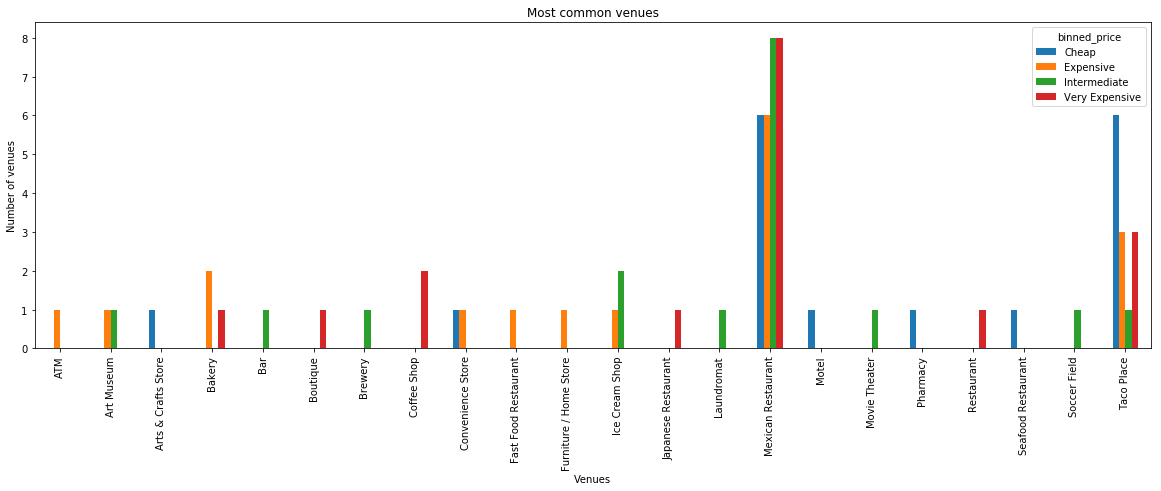

In [79]:
venues_price.plot(kind='bar', figsize=(20, 6))

plt.xlabel('Venues') # add to x-label to the plot
plt.ylabel('Number of venues') # add y-label to the plot
plt.title('Most common venues') # add title to the plot

plt.show()

In [80]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mexico_merged['Latitude'], mexico_merged['Longitude'], mexico_merged['Neighborhood'], mexico_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Now is time to analize each cluster

In [90]:
cluster_0 = mexico_merged.loc[mexico_merged['Cluster Labels'] == 0, mexico_merged.columns[[1] + list(range(4, mexico_merged.shape[1]))]]
cluster_0

,price,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
4,257.0,Expensive,0,Mexican Restaurant,Taco Place,Café,Coffee Shop,Pizza Place,Ice Cream Shop
6,127.0,Cheap,0,Mexican Restaurant,Taco Place,Coffee Shop,Pizza Place,Public Art,Fast Food Restaurant
7,315.0,Very Expensive,0,Taco Place,Mexican Restaurant,Restaurant,Burger Joint,Bar,Seafood Restaurant
8,151.0,Cheap,0,Mexican Restaurant,Taco Place,Pizza Place,Sushi Restaurant,Bakery,Bar
11,607.0,Very Expensive,0,Mexican Restaurant,Deli / Bodega,Restaurant,Taco Place,Hotel,Seafood Restaurant
12,253.0,Expensive,0,Mexican Restaurant,Coffee Shop,Bar,Plaza,Museum,Ice Cream Shop
16,253.0,Expensive,0,Mexican Restaurant,Bakery,Plaza,Restaurant,Coffee Shop,Burger Joint
19,299.0,Expensive,0,Bakery,Mexican Restaurant,Taco Place,Bar,Coffee Shop,Burger Joint
21,299.0,Expensive,0,Mexican Restaurant,Taco Place,Restaurant,Garden,Hotel,Café
23,138.0,Cheap,0,Taco Place,Mexican Restaurant,Mountain,Seafood Restaurant,Steakhouse,Burger Joint


In [91]:
cluster_0["binned_price"].value_counts()

Expensive         7
Cheap             7
Very Expensive    6
Intermediate      5
Name: binned_price, dtype: int64

The cluster 0 is balanced because the prices are very close

In [92]:
cluster_1 = mexico_merged.loc[mexico_merged['Cluster Labels'] == 1, mexico_merged.columns[[1] + list(range(4, mexico_merged.shape[1]))]]
cluster_1

,price,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
1,2083.000000,Very Expensive,1,Mexican Restaurant,Restaurant,Bakery,Park,Taco Place,Coffee Shop
2,685.000000,Very Expensive,1,Mexican Restaurant,Ice Cream Shop,Pizza Place,Italian Restaurant,Juice Bar,Gym / Fitness Center
3,197.250000,Intermediate,1,Brewery,Hotel,Pet Store,Plaza,Dessert Shop,Food & Drink Shop
5,3156.000000,Very Expensive,1,Bakery,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Pizza Place,Argentinian Restaurant
9,202.000000,Intermediate,1,Ice Cream Shop,Coffee Shop,Gym / Fitness Center,Department Store,Pizza Place,Sushi Restaurant
10,174.000000,Intermediate,1,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Gift Shop,Japanese Restaurant,Bakery
15,161.000000,Intermediate,1,Ice Cream Shop,Coffee Shop,Taco Place,Mexican Restaurant,Clothing Store,Restaurant
18,124.000000,Cheap,1,Pharmacy,Food Truck,Burger Joint,Park,Market,Coffee Shop
22,181.000000,Intermediate,1,Laundromat,Athletics & Sports,Pool,Mexican Restaurant,Castle,Exhibit
24,124.000000,Cheap,1,Motel,Pharmacy,Food Truck,Snack Place,Taco Place,Gym / Fitness Center


In [93]:
cluster_1["binned_price"].value_counts()

Intermediate      10
Very Expensive     9
Expensive          6
Cheap              5
Name: binned_price, dtype: int64

The cluster 1 is located near of Intermediate and very expensive price places

In [95]:
cluster_2 = mexico_merged.loc[mexico_merged['Cluster Labels'] == 2, mexico_merged.columns[[1] + list(range(4, mexico_merged.shape[1]))]]
cluster_2

,price,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,345.0,Very Expensive,2,Taco Place,Pizza Place,Mexican Restaurant,Shopping Mall,Burger Joint,Gym
13,154.0,Cheap,2,Taco Place,Mexican Restaurant,Pizza Place,Electronics Store,ATM,Gym
17,299.0,Expensive,2,ATM,Bus Stop,Taco Place,Pet Store,Mexican Restaurant,Flower Shop
25,262.0,Expensive,2,Taco Place,Coffee Shop,Mexican Restaurant,Pet Store,Argentinian Restaurant,Music Venue
27,500.0,Very Expensive,2,Mexican Restaurant,Taco Place,Convenience Store,Housing Development,Laundromat,Flea Market
31,128.0,Cheap,2,Taco Place,Food Truck,Mexican Restaurant,Market,Convenience Store,Gym
32,312.5,Expensive,2,Taco Place,Mexican Restaurant,Convenience Store,Park,Museum,Bus Station
38,138.0,Cheap,2,Taco Place,Mexican Restaurant,Garden,Market,Sandwich Place,Coffee Shop
49,217.0,Intermediate,2,Taco Place,Convenience Store,Soup Place,Lounge,Farmers Market,Mexican Restaurant
55,138.0,Cheap,2,Taco Place,Gym / Fitness Center,Mexican Restaurant,Martial Arts Dojo,BBQ Joint,Japanese Restaurant


In [96]:
cluster_2["binned_price"].value_counts()

Cheap             5
Expensive         3
Very Expensive    2
Intermediate      1
Name: binned_price, dtype: int64

cluster_2 es more focus to cheap areas

In [88]:
cluster_3 = mexico_merged.loc[mexico_merged['Cluster Labels'] == 3, mexico_merged.columns[[1] + list(range(4, mexico_merged.shape[1]))]]
cluster_3

,price,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
14,184.0,Intermediate,3,Mexican Restaurant,Seafood Restaurant,Bar,Farmers Market,Candy Store,Bistro


In [89]:
cluster_4 = mexico_merged.loc[mexico_merged['Cluster Labels'] == 4, mexico_merged.columns[[1] + list(range(4, mexico_merged.shape[1]))]]
cluster_4

,price,binned_price,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
20,230.0,Expensive,4,Convenience Store,Department Store,Garden,Taco Place,Gym / Fitness Center,Brewery
